In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv(r'D:\eda2\matches.csv')

In [4]:
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,League,RCB,Bowl,227.0,3.0,...,completed,RCB,NaN,6,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,Playoffs,RCB,Bowl,101.0,10.0,...,completed,RCB,NaN,8,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,Playoffs,MI,Bat,228.0,5.0,...,completed,MI,20,NaN,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,Playoffs,PBKS,Bowl,203.0,6.0,...,completed,PBKS,NaN,5,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43


In [5]:
print(df.shape)
print(df.columns)

(74, 22)
Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner',
       'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match',
       'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure'],
      dtype='object')


In [6]:
df.drop('wb_wickets',axis=1,inplace=True)
df.drop('wb_runs',axis=1,inplace=True)

In [7]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            1
toss_decision          0
first_ings_score       1
first_ings_wkts        1
second_ings_score      2
second_ings_wkts       2
match_result           0
match_winner           3
balls_left             2
player_of_the_match    3
top_scorer             3
highscore              3
best_bowling           3
best_bowling_figure    3
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  balls_left           72 non-null     float64
 15  player_of_the_match  71 non-null     objec

In [9]:
df.isna()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_result,match_winner,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,balls_left,highscore
count,74.000000,73.000000,73.000000,72.000000,72.000000,72.000000,71.000000
mean,37.500000,189.753425,6.452055,174.013889,5.513889,10.819444,74.549296
std,21.505813,37.489547,2.108456,38.805217,2.882649,17.674942,20.088226
min,1.000000,95.000000,2.000000,7.000000,0.000000,0.000000,37.000000
25%,19.250000,166.000000,5.000000,158.000000,3.000000,0.000000,61.000000
50%,37.500000,196.000000,6.000000,177.000000,5.000000,5.500000,73.000000
75%,55.750000,213.000000,8.000000,201.250000,8.000000,13.500000,88.500000
max,74.000000,286.000000,10.000000,247.000000,10.000000,114.000000,141.000000


C:\Users\DHINESH\AppData\Local\Temp\ipykernel_30008\443559025.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df['match_winner'].value_counts(),  palette=['crimson', 'red',  'darkblue','navy',  'blue','orange', 'skyblue' ,'purple','yellow' ,'pink', ])


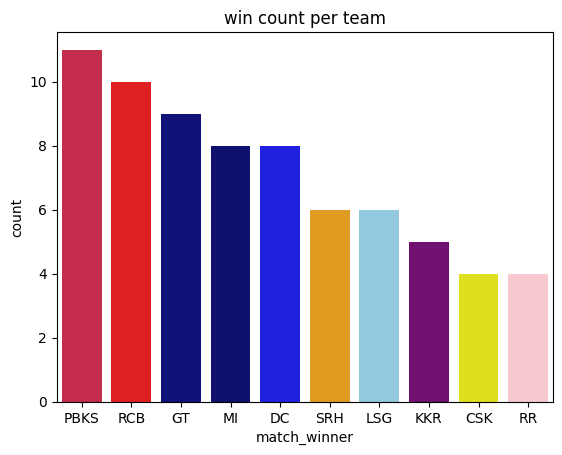

In [50]:
sns.barplot(df['match_winner'].value_counts(),  palette=['crimson', 'red',  'darkblue','navy',  'blue','orange', 'skyblue' ,'purple','yellow' ,'pink', ]) 
plt.title('win count per team')
plt.show()

In [12]:
print('top 5 match loosers')
df['match_winner'].value_counts().tail(5)

top 5 match loosers


match_winner
SRH    6
LSG    6
KKR    5
CSK    4
RR     4
Name: count, dtype: int64

C:\Users\DHINESH\AppData\Local\Temp\ipykernel_30008\83385860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_scorer.head(7),palette="viridis")


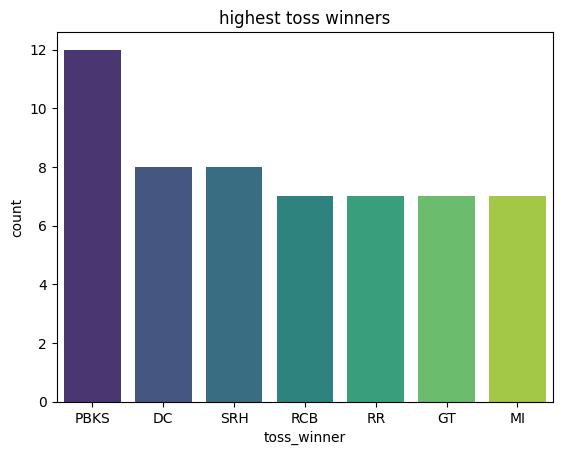

In [21]:
top_scorer=df['toss_winner'].value_counts()
sns.barplot(top_scorer.head(7),palette="viridis")
plt.title('highest toss winners')
plt.show()

In [14]:
df['man_of_match']=df['player_of_the_match'].value_counts()

In [30]:
df['player_of_the_match'].value_counts().head(5)

player_of_the_match
Krunal Pandya      3
Shreyas Iyer       3
Ishan Kishan       2
Noor Ahmad         2
Prasidh Krishna    2
Name: count, dtype: int64

In [31]:
df.groupby('toss_winner')['toss_decision'].value_counts()

toss_winner  toss_decision
CSK          Bowl             5
             Bat              1
DC           Bowl             7
             Bat              1
GT           Bowl             7
KKR          Bowl             4
             Bat              2
LSG          Bowl             4
             Bat              1
MI           Bowl             6
             Bat              1
PBKS         Bowl             7
             Bat              5
RCB          Bowl             7
RR           Bowl             7
SRH          Bowl             6
             Bat              2
Name: count, dtype: int64

In [32]:
corr = df['balls_left'].corr(df['highscore'])
print("Correlation:", corr)

Correlation: -0.2820135415964724


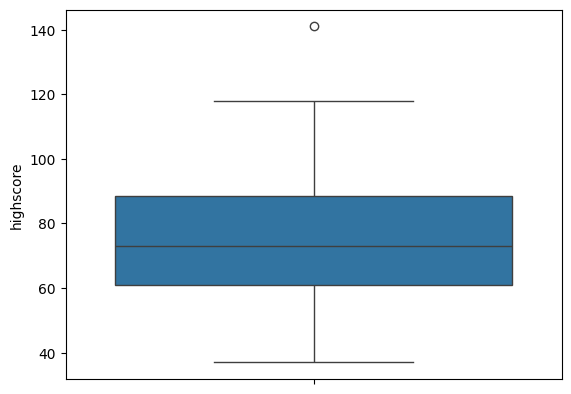

In [33]:
sns.boxplot(df['highscore'])
plt.show()

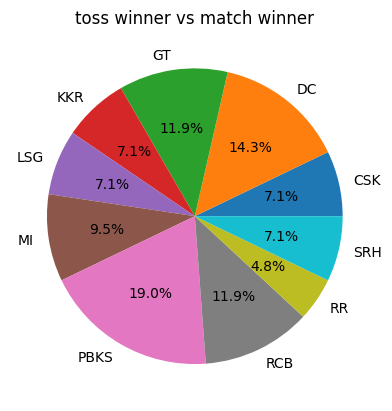

In [35]:
count=df.groupby('toss_winner')['match_winner'].apply(lambda x:(x==x.name).sum())
plt.pie(count,labels=count.index,autopct='%.1f%%')
plt.title('toss winner vs match winner')
plt.show()

In [36]:
print("stadium and number of matches")
df['venue'].value_counts()

stadium and number of matches


venue
Narendra Modi Stadium, Ahmedabad                 9
Ekana Cricket Stadium, Lucknow                   8
Eden Gardens, Kolkata                            7
Wankhede Stadium, Mumbai                         7
Arun Jaitley Stadium, Delhi                      7
Sawai Mansingh Stadium, Jaipur                   7
New PCA Cricket Stadium, Mullanpur               6
Rajiv Gandhi International Stadium, Hyderabad    6
MA Chidambaram Stadium, Chennai                  6
M. Chinnaswamy Stadium, Bangalore                6
ACA-VDCA Cricket Stadium, Vishakhapatnam         2
Barsapara Stadium, Guwahati                      2
HPCA Stadium, Dharamshala                        1
Name: count, dtype: int64

In [37]:
df['stage'].value_counts()

stage
League      70
Playoffs     3
Final        1
Name: count, dtype: int64

In [38]:
top_scorer=df.groupby('top_scorer')['player_of_the_match'].apply(lambda x:(x==x.name).sum()).sort_values(ascending=False)
top_scorer=top_scorer[top_scorer>0]
success=top_scorer.sum()
fail=df['player_of_the_match'].count()

In [39]:
probability=success/fail*100
print(f"probability that highest scorer is man of the match:{probability}")

probability that highest scorer is man of the match:45.07042253521127


In [40]:
df.groupby(['venue', 'toss_winner'])['match_winner'].value_counts().head(10)

venue                                     toss_winner  match_winner
ACA-VDCA Cricket Stadium, Vishakhapatnam  DC           DC              1
                                          SRH          DC              1
Arun Jaitley Stadium, Delhi               DC           DC              1
                                                       KKR             1
                                          GT           GT              1
                                          RCB          RCB             1
                                          RR           DC              1
                                                       RR              1
                                          SRH          SRH             1
Barsapara Stadium, Guwahati               CSK          RR              1
Name: count, dtype: int64

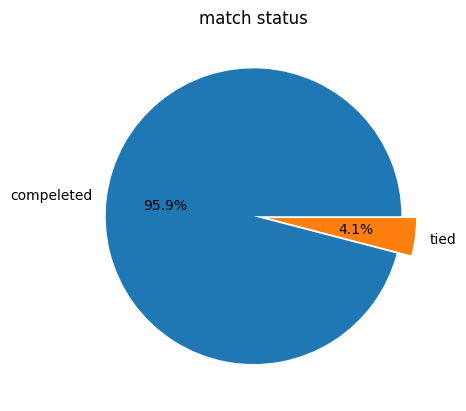

In [41]:
count_of_matchstatus=df['match_result'].value_counts()
plt.pie(count_of_matchstatus,labels=['compeleted','tied'],autopct='%1.1f%%',explode=[0,0.1])
plt.title('match status')
plt.show()

In [42]:
df.groupby('match_winner')['balls_left'].value_counts()

match_winner  balls_left
CSK           2.0           1
              3.0           1
              5.0           1
              9.0           1
DC            0.0           2
              3.0           2
              13.0          2
              6.0           1
              24.0          1
GT            0.0           4
              4.0           2
              6.0           1
              13.0          1
              20.0          1
KKR           0.0           2
              15.0          1
              20.0          1
              59.0          1
LSG           0.0           4
              3.0           1
              23.0          1
MI            0.0           2
              26.0          2
              10.0          1
              11.0          1
              23.0          1
              43.0          1
PBKS          0.0           4
              2.0           1
              6.0           1
              7.0           1
              9.0           1
              1

In [43]:
df['success']=df['second_ings_score']>df['first_ings_score']
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,man_of_match,success
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,NaN,True
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,NaN,False
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18,NaN,True
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42,NaN,True
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,NaN,False


In [44]:
ecoder=LabelEncoder()
df['success']=ecoder.fit_transform(df['success'])

In [45]:
df['stage'].unique()

array(['League', 'Playoffs', 'Final'], dtype=object)

In [46]:
df.groupby('stage')['match_winner'].value_counts()

stage     match_winner
Final     RCB              1
League    PBKS            10
          GT               9
          DC               8
          RCB              8
          MI               7
          LSG              6
          SRH              6
          KKR              5
          CSK              4
          RR               4
Playoffs  MI               1
          PBKS             1
          RCB              1
Name: count, dtype: int64

In [47]:
df['success']

0     1
1     0
2     1
3     1
4     0
     ..
69    1
70    1
71    0
72    1
73    0
Name: success, Length: 74, dtype: int64

In [48]:
df.groupby('success')['match_winner'].value_counts()

success  match_winner
0        GT              5
         PBKS            5
         RCB             5
         LSG             4
         MI              4
         DC              3
         KKR             3
         SRH             3
         RR              2
         CSK             1
1        PBKS            6
         DC              5
         RCB             5
         GT              4
         MI              4
         CSK             3
         SRH             3
         KKR             2
         LSG             2
         RR              2
Name: count, dtype: int64

In [49]:
df_encoded = pd.get_dummies(df, columns=["stage"], drop_first=True)
display(df_encoded)

,match_id,date,venue,team1,team2,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,...,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,man_of_match,success,stage_League,stage_Playoffs
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,RCB,Bowl,174.0,8.0,177.0,...,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,NaN,1,True,False
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,RR,Bowl,286.0,6.0,242.0,...,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,NaN,0,True,False
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,CSK,Bowl,155.0,9.0,158.0,...,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18,NaN,1,True,False
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,DC,Bowl,209.0,8.0,211.0,...,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42,NaN,1,True,False
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,GT,Bowl,243.0,5.0,232.0,...,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30,NaN,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 27,2025","Ekana Cricket Stadium, Lucknow",LSG,RCB,RCB,Bowl,227.0,3.0,230.0,...,8.0,Jitesh Sharma,Rishabh Pant,118.0,Will O'Rourke,2--74,NaN,1,True,False
70,71,"May 29,2025","New PCA Cricket Stadium, Mullanpur",PBKS,RCB,RCB,Bowl,101.0,10.0,106.0,...,60.0,Suyash Sharma,Phil Salt,56.0,Suyash Sharma,3--17,NaN,1,False,True
71,72,"May 30,2025","New PCA Cricket Stadium, Mullanpur",GT,MI,MI,Bat,228.0,5.0,208.0,...,0.0,Rohit Sharma,Rohit Sharma,81.0,Sai Kishore,2--42,NaN,0,False,True
72,73,"June 1,2025","Narendra Modi Stadium, Ahmedabad",PBKS,MI,PBKS,Bowl,203.0,6.0,207.0,...,6.0,Shreyas Iyer,Shreyas Iyer,87.0,Azmatullah Omarzai,2--43,NaN,1,False,True
